# **Task 4 - Email Spam Detection With Machine Learning**
*(by Anushka Gupta)*

# **Steps :-**
1. Loading data
2. Data exploration
3. Exploratory data analysis (EDA)
4. Model development
5. Testing the model

# **1. Load the data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin-1')  #Every character is encoded as a single byte

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **2. Data exploration**

In [3]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
df = data.copy()
df = data.rename(columns={"v1":"label", "v2":"text"})

In [5]:
df.shape

(5572, 5)

In [6]:
df.isnull().sum()

label            0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [9]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **3. Exploratory Data Analysis**

In [10]:
df.duplicated().sum() 

403

In [11]:
df.drop_duplicates(keep='first')

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
#Number of spams and hams:

df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

<AxesSubplot:ylabel='Count'>

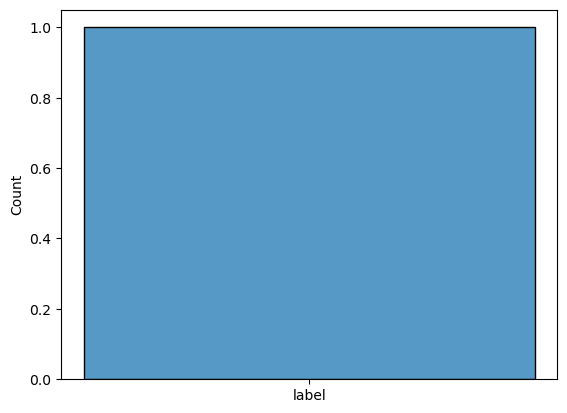

In [16]:
sns.histplot('label') #wrong output

In [17]:
y=df.label
y.value_counts()

ham     4516
spam     653
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='Count'>

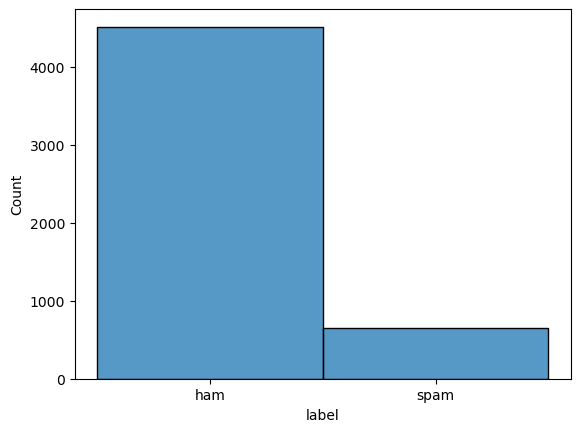

In [18]:
sns.histplot(y)

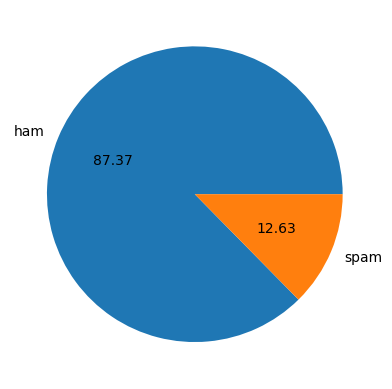

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [20]:
sns.countplot(df['label'])

ValueError: could not convert string to float: 'ham'

# **4. Model development**

In [ ]:
x = np.array(df['text'])
y =np.array(df['label'])
cv= CountVectorizer()
X =cv.fit_transform(x)

In [ ]:
cv= CountVectorizer()
x=cv.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.33)

In [ ]:
clf= MultinomialNB()
clf.fit(x_train,y_train)

# **5. Testing the model**

In [ ]:
sample = input('Enter a massage:')
df =cv.transform([sample]).toarray()
print(clf.predict(df))

In [ ]:
sample = input('Enter a massage:')
df =cv.transform([sample]).toarray()
print(clf.predict(df))

In [ ]:
sample = input('Enter a massage:')
df =cv.transform([sample]).toarray()
print(clf.predict(df))

**Basic model for email spam ham classification is made.**